In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import numpy as np
import ast
from plotting import load_result, plot_error, load_data

In [2]:
rxor_mean_errors, xnor_mean_errors, rxor_single_task_errors, xnor_single_task_errors = load_data()

In [3]:
np.array(xnor_mean_errors).shape

(8, 59)

In [4]:
def get_mean_te(multi_task_errors, single_task_errors):
    '''
    input: 
    multi_task_errors
    0: sSynf, 1: SDF, 2 bSynf, DF
    single_task_errors (task 2)
    
    returns 4 array with
    0: stream synergistic forest TE 
    1: SDF TE 
    2: Batch synergistic forest TE
    3:Batch DF TE
    '''
    te = np.empty((4,59))
    te[0, :] = np.log(np.array(single_task_errors[0])/np.array(multi_task_errors[1])) # stream synf
    te[1, :] = np.log(np.array(single_task_errors[1])/np.array(multi_task_errors[3])) # SDF
    te[2, :] = np.log(np.array(single_task_errors[2])/np.array(multi_task_errors[5])) # batch synf
    te[3, :] = np.log(np.array(single_task_errors[3])/np.array(multi_task_errors[7])) # batch df]

    return te

In [5]:
transfer_efficiencies = get_mean_te(xnor_mean_errors, xnor_single_task_errors)
transfer_efficiencies.shape

(4, 59)

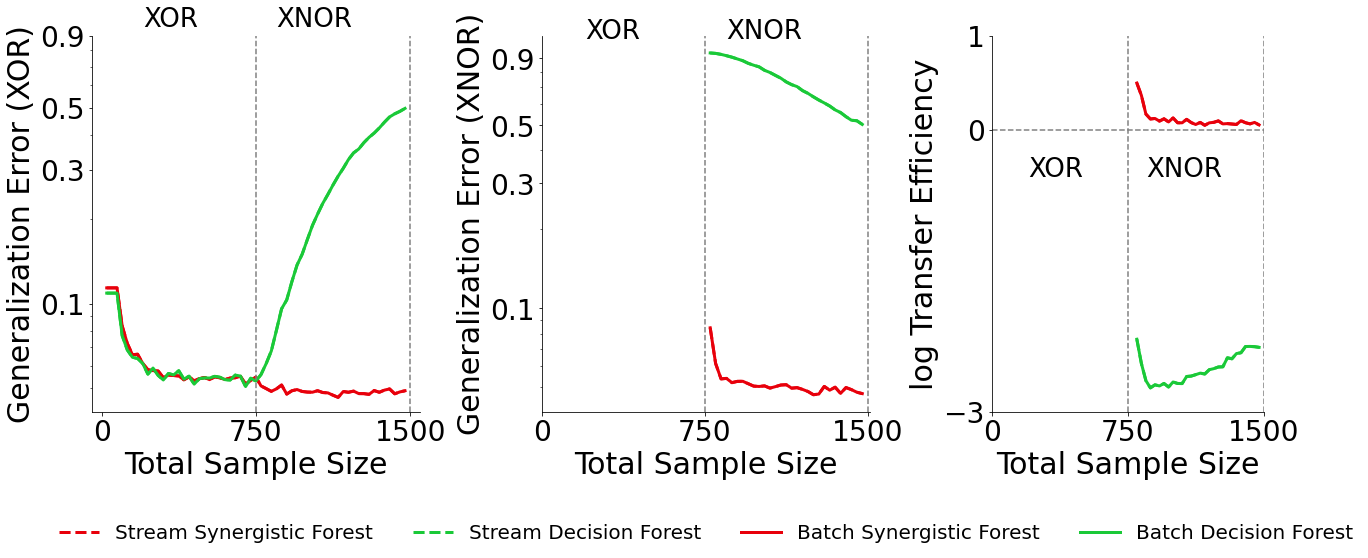

In [6]:
plot_error(np.array(xnor_mean_errors), "XNOR", transfer_efficiencies)

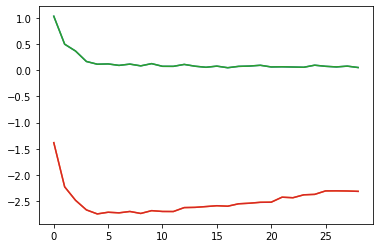

In [11]:
for i in range(4):
    plt.plot(transfer_efficiencies[i,30:])

In [8]:
print(np.arange(0.5,7.5, step=0.25))
print(np.arange(0.25,7.5,step=0.25))
28+29

[0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5  3.75
 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.   6.25 6.5  6.75 7.   7.25]
[0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5
 3.75 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.   6.25 6.5  6.75 7.
 7.25]


57

In [9]:
print(np.arange(.25,15,step=0.25).shape)
print(np.arange(.5,14.75,step=0.25).shape)

(59,)
(57,)


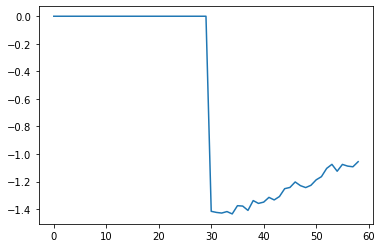

In [10]:
top = np.array(load_result("batch_synf/rxor_single_task_error_rxor.txt"))
bottom = np.array(load_result("df/rxor_exp_rxor_error.txt"))

te=top/bottom

plt.plot(np.log(te))